# Dune Tweets Sentiment Analysis

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
import pandas as pd
import re
import json
nltk.download('vader_lexicon')
import numpy as np
np.random.seed(37)
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nils\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Load dataset

In [2]:
tweets_raw = []
with open('dune_tweets.json') as json_file:
    for line in json_file:
        tweets_raw.append(json.loads(line))
tweets_raw = pd.DataFrame(tweets_raw)
tweets_raw.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/laicie/status/145242466184...,2021-10-24T23:59:58+00:00,Running on about 5hrs of sleep and just got ba...,Running on about 5hrs of sleep and just got ba...,1452424661841686534,"{'_type': 'snscrape.modules.twitter.User', 'us...",6,0,9,...,None,None,None,NaN,None,None,None,None,[Dune],None
1,snscrape.modules.twitter.Tweet,https://twitter.com/MMAzing33/status/145242466...,2021-10-24T23:59:58+00:00,@Timcast You people are crazy. Go back to watc...,@Timcast You people are crazy. Go back to watc...,1452424661522911240,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Gif', 'th...",None,None,1.452407e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/Crawdaddct/status/14524246...,2021-10-24T23:59:55+00:00,"@filmdaze It can be better in theaters, but co...","@filmdaze It can be better in theaters, but co...",1452424648868630528,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,None,None,1.452142e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/DelindaArts/status/1452424...,2021-10-24T23:59:55+00:00,@persephonexo_ Precisely! That’s really my onl...,@persephonexo_ Precisely! That’s really my onl...,1452424648050814976,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,...,None,None,None,1.452423e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/Akashandhisls/status/14524...,2021-10-24T23:59:54+00:00,Dune: Denis Villeneuve has done it once more! ...,Dune: Denis Villeneuve has done it once more! ...,1452424645320261632,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,...,None,None,None,NaN,None,None,None,None,None,None


### Drop columns we likely won't use again

In [3]:
tweets_drop = tweets_raw.drop(columns=['_type', 'url', 'date', 'id', 'user', 'coordinates', 'place', \
                                       'source', 'sourceUrl', 'lang', 'conversationId', 'sourceLabel', \
                                       'outlinks', 'tcooutlinks', 'media'])
tweets_drop.head()

,content,renderedContent,replyCount,retweetCount,likeCount,quoteCount,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,hashtags,cashtags
0,Running on about 5hrs of sleep and just got ba...,Running on about 5hrs of sleep and just got ba...,6,0,9,0,None,None,NaN,None,None,[Dune],None
1,@Timcast You people are crazy. Go back to watc...,@Timcast You people are crazy. Go back to watc...,0,0,0,0,None,None,1.452407e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None
2,"@filmdaze It can be better in theaters, but co...","@filmdaze It can be better in theaters, but co...",0,0,1,0,None,None,1.452142e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None
3,@persephonexo_ Precisely! That’s really my onl...,@persephonexo_ Precisely! That’s really my onl...,1,0,1,0,None,None,1.452423e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None
4,Dune: Denis Villeneuve has done it once more! ...,Dune: Denis Villeneuve has done it once more! ...,1,0,3,0,None,None,NaN,None,None,None,None


## Data cleaning?

Not all tweets containing 'dune' are about the movie, although most will be. From the first 100 entries looking by hand, I can find only 1 tweet of which I'm not sure if it's related to the movie. Therefore, with only an estimated 1% irrelevant tweets, this amount of noise is acceptable

In [4]:
pd.set_option('display.max_colwidth', None)
print(tweets_drop[:100].content.to_string(index=False))

                                                                                                                                                                                                Running on about 5hrs of sleep and just got baby down… it would be… a bad idea to stay up and watch #Dune?
                                                                                                                                                                                       @Timcast You people are crazy. Go back to watching Marvel movies. Dune is too good for you. https://t.co/PDN4z6RpBr
                                                                                                                                                                  @filmdaze It can be better in theaters, but correct.  Luckily Dune is great either way.  Just better on the biggest screen you can find.
                                                                                                       

In [5]:
content = tweets_drop.content
content.head()

0                                                                                                      Running on about 5hrs of sleep and just got baby down… it would be… a bad idea to stay up and watch #Dune?
1                                                                                             @Timcast You people are crazy. Go back to watching Marvel movies. Dune is too good for you. https://t.co/PDN4z6RpBr
2                                                                        @filmdaze It can be better in theaters, but correct.  Luckily Dune is great either way.  Just better on the biggest screen you can find.
3                                                                                                                                               @persephonexo_ Precisely! That’s really my only gripe with Dune 😭
4    Dune: Denis Villeneuve has done it once more! He's taken something that could've been phenomenal, exhilarating, and awesome and turned it into mediocre, bo

In [6]:
aspect_words = {'score' : {'music', 'sound', 'score', 'lyrics', 'rhythm', 'soundtrack', 'audio', 'musical', 'track'},
                'cast'  : {'act', 'actor', 'actress', 'actors', 'actresses', 'acting', 'role', 'character', 'portray', 
                        'villain', 'hero', 'performance', 'performed', 'played', 'casting', 'cast'},
                'rest'  : set(),  # {} is interpreted as a dict/set differently depending on version
                'plot'  : {'story', 'plot', 'storyline', 'tale', 'romance', 'drama', 'dialog', 'script', 'ending',
                        'revenge', 'betrayal', 'betrayed', 'writing', 'twist'},
                'prod'  : {'scene', 'scenery', 'camera', 'visual', 'visually', 'shot', 'stunt', 'screenplay', 'animation',
                             'special effect', 'special effects', 'props', 'action'}}

def determine_categories(tweets):
    """
    Categorizes a tweet into talking about 'score', 'cast', 'plot', 'production', or anything else.
    This is done by counting the overlap between the contained words and so-called aspect_words, 
    which are words related to the specific topic. The topic with the largest overlap is chosen, 
    with the default being 'rest'
    
    Returns a dataframe with tweet content and the allocated category
    """
    
    categories = []
    
    for tweet in tweets:
        words = set([word.lower() for word in tweet.split(' ')])
        affinity = {}
        affinity['rest']  = len(words & aspect_words['rest'])
        affinity['score'] = len(words & aspect_words['score'])
        affinity['cast']  = len(words & aspect_words['cast'])
        affinity['plot']  = len(words & aspect_words['plot'])
        affinity['prod']  = len(words & aspect_words['prod'])
        categories.append(max(affinity, key=affinity.get))
    return pd.DataFrame(zip(list(tweets), categories), columns=['content', 'category'])

In [7]:
def calculate_polarity(tweets):
    """
    Calculates the sentiment polarity of an array-like structure. 
    
    Divides entries into positive or negative depending on highest score, neutral in case of a tie.
    Returns the list with the label for each entry, as well as the percentages in a dictionary
    """
    
    polarity_list = []
    percentages = {'n_pos' : 0,
                   'n_neg' : 0,
                   'n_neu' : 0}
    length = len(tweets)
    for tweet in tweets:
        score = SentimentIntensityAnalyzer().polarity_scores(tweet)
        neg = score['neg']
        pos = score['pos']
        if neg > pos:
            polarity_list.append('neg')
            percentages['n_neg'] += 1
        elif pos > neg:
            polarity_list.append('pos')
            percentages['n_pos'] += 1
        else:
            polarity_list.append('neu')
            percentages['n_neu'] += 1
    return polarity_list, {p:percentages[p] / length for p in percentages}

In [8]:
pd.set_option('display.max_colwidth', None)
tweets_cat = determine_categories(content)
tweets_cat.head()

,content,category
0,Running on about 5hrs of sleep and just got baby down… it would be… a bad idea to stay up and watch #Dune?,rest
1,@Timcast You people are crazy. Go back to watching Marvel movies. Dune is too good for you. https://t.co/PDN4z6RpBr,rest
2,"@filmdaze It can be better in theaters, but correct. Luckily Dune is great either way. Just better on the biggest screen you can find.",rest
3,@persephonexo_ Precisely! That’s really my only gripe with Dune 😭,rest
4,"Dune: Denis Villeneuve has done it once more! He's taken something that could've been phenomenal, exhilarating, and awesome and turned it into mediocre, boring material to slog through. All hail the king!",rest


Most of the results will have category rest, but let's see the percentages:

In [9]:
length = len(tweets_cat)

rest = tweets_cat[tweets_cat.category=='rest']
score = tweets_cat[tweets_cat.category=='score']
cast = tweets_cat[tweets_cat.category=='cast']
plot = tweets_cat[tweets_cat.category=='plot']
prod = tweets_cat[tweets_cat.category=='prod']

print("Category percentages: ")
print("Rest:{:.2f}%".format(len(rest) / length * 100))
print("Score:{:.2f}%".format(len(score) / length * 100))
print("Cast:{:.2f}%".format(len(cast) / length * 100))
print("Plot:{:.2f}%".format(len(plot) / length * 100))
print("Prod:{:.2f}%".format(len(prod) / length * 100))

Category percentages: 
Rest:90.36%
Score:2.39%
Cast:2.66%
Plot:2.64%
Prod:1.95%


As expected, the 'general' category contains by far the most tweets, as the other categories already imply a review or opinion of sorts, which is not the only thing people tweet about the movie.

Let's pick a few tweets from different categories to see what people are saying:

In [10]:
print("Rest:", np.random.choice(rest.content), "\n")
print("Score:", np.random.choice(score.content), "\n")
print("Cast:", np.random.choice(cast.content), "\n")
print("Plot:", np.random.choice(plot.content), "\n")
print("Prod:", np.random.choice(prod.content), "\n")

Rest: if you must cover yourself with dust
then take dust from the greatest of dunes 

Score: @Factsonfilm Eventually Tenet was good as dune in bg score 

Cast: @autotwinkphile You know you look like main actor in new dune movie! The timothée dude! 

Plot: Alright so Out of theater thoughts about #Dune 

1. Its imcomplete, which I really really dislike. You can make a part 1 of a movie series that has a clear story in 1 movie itself. This movie does not do that and it leaves one major poor taste in my mouth. 

Prod: Saying Dune is Denis Villeneuve’s biggest opening is a bit like saying Ronaldo has had Man Utd’s best shot today 



From this we see that the categorization mostly worked, with exception of the score as "score" in this sentence is used to describe a rating rather than music. The "cast" sentence isn't actually talking about the movie directly, or at least only vaguely describing an opinion about it. 

Let's see if this holds for some more tweets:

In [11]:
for _ in range(3):
    print("Rest:", np.random.choice(rest.content), "\n")
    print("Score:", np.random.choice(score.content), "\n")
    print("Cast:", np.random.choice(cast.content), "\n")
    print("Plot:", np.random.choice(plot.content), "\n")
    print("Prod:", np.random.choice(prod.content), "\n")

Rest: @Optimus_Crime12 @conorsen I think that is when I can midday make the time. Enjoy the first Dune installment. Sort of happy it is not the whole first book in one movie. The book is so dense. Hard to ever do books a true justice in film. 

Score: hans zimmer went crazy with the dune soundtrack 

Cast: David Lynch’s Dune bombed, but was actually foundational: Image: Universal Pictures Home Entertainment Galaxy Brains debates the past with Dune 2021 actor David Dastmalchian Continue reading… https://t.co/fHwQiwB8uF https://t.co/hteVAFwgxn 

Plot: @JosephFanai10 @CultureCrave Yes, a horror film around Halloween time titled Halloween kills with Michael Myers killing people with no story driven plot or anything. Of course it’s gonna sell dumbass 😂 clearly you haven’t seen dune yet and you’re hating for no reason. 

Prod: A visual element of #Dune that I don't think anyone has praised nearly enough is the spice itself. It's actually visible when it gets windy in the film by glistening w

So the categories mostly hold up, this is very nice to see! Some words that are ambiguous however are: 'score' for score, 'played' for cast, and 'writing' for plot. 

Some words that could be included in this example specifically are: 'Zimmer' for score

Next we'll assign a polarity to each tweet per category, to obtain both the actual assignments and the percentage

In [12]:
rest_pol, n_rest_pol   = calculate_polarity(rest.content)
score_pol, n_score_pol = calculate_polarity(score.content)
cast_pol, n_cast_pol   = calculate_polarity(cast.content)
plot_pol, n_plot_pol   = calculate_polarity(plot.content)
prod_pol, n_prod_pol   = calculate_polarity(prod.content)

In [13]:
print("Rest:", n_rest_pol)
print("Score:", n_score_pol)
print("Cast:", n_cast_pol)
print("Plot:", n_plot_pol)
print("Prod:", n_prod_pol)

Rest: {'n_pos': 0.4734733626967088, 'n_neg': 0.19105376153692924, 'n_neu': 0.335472875766362}
Score: {'n_pos': 0.6722408026755853, 'n_neg': 0.16638795986622074, 'n_neu': 0.16137123745819398}
Cast: {'n_pos': 0.6764264264264265, 'n_neg': 0.21096096096096095, 'n_neu': 0.11261261261261261}
Plot: {'n_pos': 0.6418816388467374, 'n_neg': 0.23672230652503792, 'n_neu': 0.12139605462822459}
Prod: {'n_pos': 0.6526207605344296, 'n_neg': 0.1778006166495375, 'n_neu': 0.1695786228160329}


As we can see from this, in each category comments are mostly positive. However, comments about specific aspects of the movie are generally more positive than those talking about the movie in general

C:\Users\Nils\AppData\Local\Temp/ipykernel_11636/4151277566.py:16: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(n_prod_pol.values(), labels=n_prod_pol.keys())


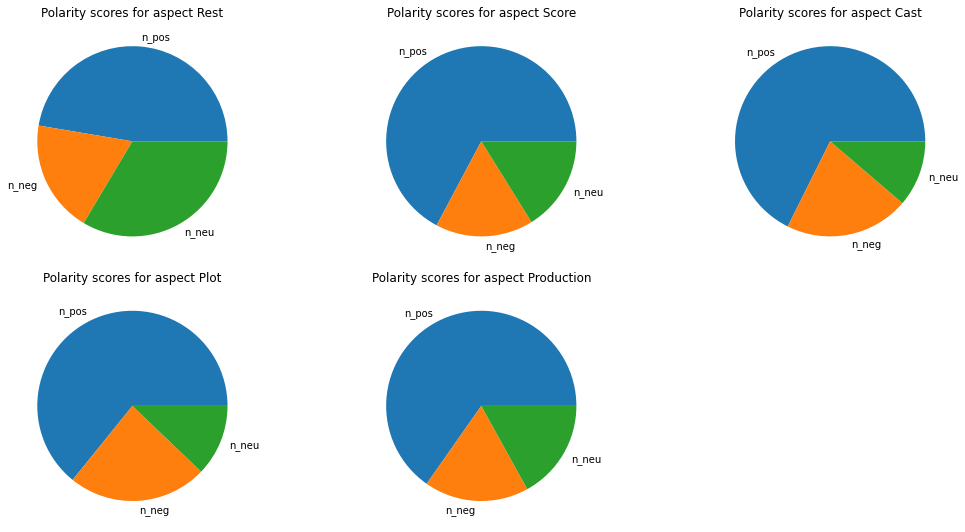

In [23]:
plt.figure(figsize=(15, 7.5))
plt.subplot(2, 3, 1)
plt.title("Polarity scores for aspect Rest")
plt.pie(n_rest_pol.values(), labels=n_rest_pol.keys())
plt.subplot(2, 3, 2)
plt.title("Polarity scores for aspect Score")
plt.pie(n_score_pol.values(), labels=n_score_pol.keys())
plt.subplot(2, 3, 3)
plt.title("Polarity scores for aspect Cast")
plt.pie(n_cast_pol.values(), labels=n_cast_pol.keys())
plt.subplot(2, 3, 4)
plt.title("Polarity scores for aspect Plot")
plt.pie(n_plot_pol.values(), labels=n_plot_pol.keys())
plt.subplot(2, 3, 5)
plt.title("Polarity scores for aspect Production")
plt.pie(n_prod_pol.values(), labels=n_prod_pol.keys())
plt.tight_layout()
plt.show()

In [47]:
import textwrap

score_pol_arr = np.array(score_pol)
arr = np.array(score.content)[score_pol_arr == 'neu']
for i in range(10):
    print(textwrap.fill(arr[i], 6))
    print()

@tabsout Lots of Dune references in the track Giza Butler.

@LeonSKennedyPhD @djkombuchagal wait so arak is also dune???
i thought dune was just the title to make it sound deep.

Me vengo enterando que Hans Zimmer hizo el soundtrack de
Dune and it shows🥵

Dune de verdad que deserves all the HYPE QUE PELICULÓNN
AHHHHHH🤩🤩🤩🤩🤩, cada vez que sonaba el  soundtrack de Zimmer
my soul left my body (as usual) 1000/10 wao, THE ACTING
ALSO🤩

listening to the dune soundtrack  https://t.co/blTRiepThU

@forcemarker I love ‘‘em both, Ludwig has been consistently
more innovative but after seeing Dune in a Dolby Atmos
theater it’s hard to deny that Zimmer didn’t just re invent
the sound of sci fi.

Hans zimmer put his whole composerussy into the dune sound
track

me putting the dune soundtrack on repeat
https://t.co/WcFC4Pb3bw

i wanna see dune again to feel hans zimmer score rumble
through my chest  HUHAAAAAAHHH

Welp guess I need the vinyl for the Dune soundtrack

